In [51]:
#Import packages
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
#Import datasets using read_csv function 
dailyIntensity = pd.read_csv(r"C:\Users\fabia\Downloads\fitbit fitness tracker data\dailyIntensities_merged.csv")
weightLog = pd.read_csv(r"C:\Users\fabia\Downloads\fitbit fitness tracker data\weightLogInfo_merged.csv")
dailySteps = pd.read_csv(r"C:\Users\fabia\Downloads\fitbit fitness tracker data\dailySteps_merged.csv")
dailyCalories =pd.read_csv(r"C:\Users\fabia\Downloads\fitbit fitness tracker data\dailyCalories_merged.csv")

In [3]:
#Preview of the dataset
dailyIntensity.head(10)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71
5,1503960366,4/17/2016,539,164,20,38,0.0,2.51,0.78,3.19
6,1503960366,4/18/2016,1149,233,16,42,0.0,4.71,0.64,3.25
7,1503960366,4/19/2016,775,264,31,50,0.0,5.03,1.32,3.53
8,1503960366,4/20/2016,818,205,12,28,0.0,4.24,0.48,1.96
9,1503960366,4/21/2016,838,211,8,19,0.0,4.65,0.35,1.34


In [8]:
weightLog.head(5)

,Id,Date,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016,NaN,21.690001,True,1463097599000


In [9]:
dailySteps.head(5)

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [7]:
dailyCalories.head(5)

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [10]:
#Check if there are any null or missing values
missing_values_weightLog = weightLog.isnull().sum()
missing_values_weightLog[:]


Id                 0
Date               0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [11]:
#There are 67 rows on weightLog table and 65 are null,therefore I cant use it.
del weightLog["Fat"]


In [12]:
missing_values_dailyIntensity = dailyIntensity.isnull().sum()
missing_values_dailyIntensity[:]

Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
dtype: int64

In [13]:
missing_values_dailySteps = dailySteps.isnull().sum()
missing_values_dailySteps[:]

Id             0
ActivityDay    0
StepTotal      0
dtype: int64

In [14]:
dailyIntensity.info()
#ActivityDay is Dtype object but should be datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


In [15]:
weightLog.info()
#Date is also Dtype object and needs to be converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   BMI             67 non-null     float64
 3   IsManualReport  67 non-null     bool   
 4   LogId           67 non-null     int64  
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 2.3+ KB


In [16]:
#Find how many unique members I have 
uniqueId = len(pd.unique(dailyIntensity["Id"]))
  
print("# of unique Id: " + str(uniqueId))

# of unique Id: 33


In [19]:
#convert "ActivityDay" to datetime type
dailyIntensity["ActivityDay"] = pd.to_datetime(dailyIntensity["ActivityDay"], format="%m/%d/%Y")

In [20]:
#Verify it was changed
dailyIntensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDay               940 non-null    datetime64[ns]
 2   SedentaryMinutes          940 non-null    int64         
 3   LightlyActiveMinutes      940 non-null    int64         
 4   FairlyActiveMinutes       940 non-null    int64         
 5   VeryActiveMinutes         940 non-null    int64         
 6   SedentaryActiveDistance   940 non-null    float64       
 7   LightActiveDistance       940 non-null    float64       
 8   ModeratelyActiveDistance  940 non-null    float64       
 9   VeryActiveDistance        940 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 73.6 KB


In [21]:
# Convert "Date" to datetime type
weightLog["Date"] = pd.to_datetime(weightLog["Date"], format="%m/%d/%Y")

# Convert "IsManualReport" from boolean to 0's and 1's
weightLog["IsManualReport"] = weightLog["IsManualReport"].astype(int)

In [22]:
weightLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   BMI             67 non-null     float64       
 3   IsManualReport  67 non-null     int32         
 4   LogId           67 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 2.5 KB


In [23]:
#Convert ActivityDay column to datetime
dailySteps["ActivityDay"] = pd.to_datetime(dailySteps["ActivityDay"], format="%m/%d/%Y")

In [24]:
dailySteps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           940 non-null    int64         
 1   ActivityDay  940 non-null    datetime64[ns]
 2   StepTotal    940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


In [25]:
# create new column "DayOfTheWeek" to represent day of the week 
dailyIntensity["DayOfTheWeek"] = dailyIntensity["ActivityDay"].dt.day_name()

# print 1st 5 rows to confirm
dailyIntensity["DayOfTheWeek"].head(5)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

In [26]:
# Create new column "TotalMins" containing sum of total minutes. This will tell us for how long these people wore their fitbit
dailyIntensity["TotalMins"] = dailyIntensity["VeryActiveMinutes"] + dailyIntensity["FairlyActiveMinutes"] + dailyIntensity["LightlyActiveMinutes"] + dailyIntensity["SedentaryMinutes"]
# Create new column "TotalHours" containing total minutes/60
dailyIntensity["TotalHours"] = round(dailyIntensity["TotalMins"]/60)

#Create new column "TotalDistance" containing sum of total distance
dailyIntensity["TotalDistance"] = dailyIntensity["VeryActiveDistance"] + dailyIntensity["ModeratelyActiveDistance"] + dailyIntensity["LightActiveDistance"] + dailyIntensity["SedentaryActiveDistance"]


In [27]:
dailyIntensity.head(5)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,DayOfTheWeek,TotalMins,TotalHours,TotalDistance
0,1503960366,2016-04-12,728,328,13,25,0.0,6.06,0.55,1.88,Tuesday,1094,18.0,8.49
1,1503960366,2016-04-13,776,217,19,21,0.0,4.71,0.69,1.57,Wednesday,1033,17.0,6.97
2,1503960366,2016-04-14,1218,181,11,30,0.0,3.91,0.40,2.44,Thursday,1440,24.0,6.75
3,1503960366,2016-04-15,726,209,34,29,0.0,2.83,1.26,2.14,Friday,998,17.0,6.23
4,1503960366,2016-04-16,773,221,10,36,0.0,5.04,0.41,2.71,Saturday,1040,17.0,8.16


In [28]:
#Merge dailyIntensity dataframe and dailySteps 
#to have the total steps with the rest of the data
dailyActivity = dailyIntensity.merge(dailySteps)
dailyActivity.head(5)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,DayOfTheWeek,TotalMins,TotalHours,TotalDistance,StepTotal
0,1503960366,2016-04-12,728,328,13,25,0.0,6.06,0.55,1.88,Tuesday,1094,18.0,8.49,13162
1,1503960366,2016-04-13,776,217,19,21,0.0,4.71,0.69,1.57,Wednesday,1033,17.0,6.97,10735
2,1503960366,2016-04-14,1218,181,11,30,0.0,3.91,0.40,2.44,Thursday,1440,24.0,6.75,10460
3,1503960366,2016-04-15,726,209,34,29,0.0,2.83,1.26,2.14,Friday,998,17.0,6.23,9762
4,1503960366,2016-04-16,773,221,10,36,0.0,5.04,0.41,2.71,Saturday,1040,17.0,8.16,12669


In [29]:
dailyActivity.describe()

,Id,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,TotalMins,TotalHours,TotalDistance,StepTotal
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,991.210638,192.812766,13.564894,21.164894,0.001606,3.340819,0.567543,1.502681,1218.753191,20.313830,5.412649,7637.910638
std,2.424805e+09,301.267437,109.174700,19.987404,32.844803,0.007346,2.040655,0.883580,2.658941,265.931767,4.437283,3.936421,5087.150742
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,729.750000,127.000000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,989.750000,16.000000,2.540000,3789.750000
50%,4.445115e+09,1057.500000,199.000000,6.000000,4.000000,0.000000,3.365000,0.240000,0.210000,1440.000000,24.000000,5.175000,7405.500000
75%,6.962181e+09,1229.500000,264.000000,19.000000,32.000000,0.000000,4.782500,0.800000,2.052500,1440.000000,24.000000,7.637500,10727.000000
max,8.877689e+09,1440.000000,518.000000,143.000000,210.000000,0.110000,10.710000,6.480000,21.920000,1440.000000,24.000000,28.040000,36019.000000


In [159]:
weightLog.describe()

,Id,BMI,IsManualReport,LogId
count,6.700000e+01,67.000000,67.000000,6.700000e+01
mean,7.009282e+09,25.185224,0.611940,1.461772e+12
std,1.950322e+09,3.066963,0.490986,7.829948e+08
min,1.503960e+09,21.450001,0.000000,1.460444e+12
25%,6.962181e+09,23.959999,0.000000,1.461079e+12
50%,6.962181e+09,24.389999,1.000000,1.461802e+12
75%,8.877689e+09,25.559999,1.000000,1.462375e+12
max,8.877689e+09,47.540001,1.000000,1.463098e+12


In [30]:
dailyCalories.describe()

,Id,Calories
count,9.400000e+02,940.000000
mean,4.855407e+09,2303.609574
std,2.424805e+09,718.166862
min,1.503960e+09,0.000000
25%,2.320127e+09,1828.500000
50%,4.445115e+09,2134.000000
75%,6.962181e+09,2793.250000
max,8.877689e+09,4900.000000


In [31]:
# Import matplotlib package
import matplotlib.pyplot as plt

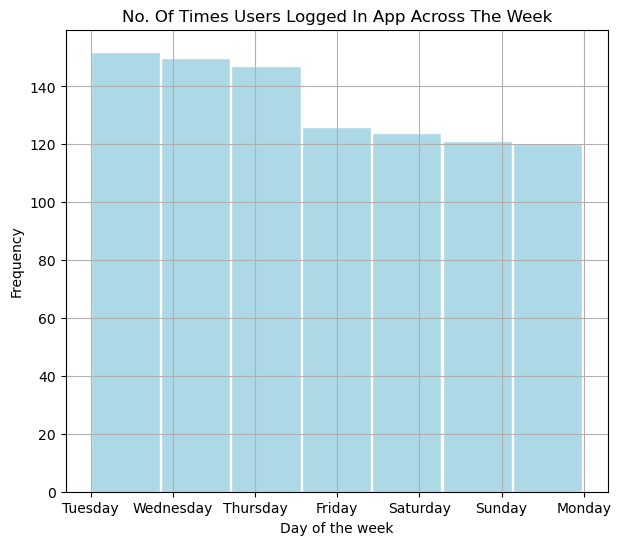

In [32]:
# Plotting histogram
plt.style.use("default")
plt.figure(figsize=(7,6)) # specify size of the chart
plt.hist(dailyIntensity.DayOfTheWeek, bins = 7, 
         width = 0.84, color = "lightblue", edgecolor = "white")

# Adding labels
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. Of Times Users Logged In App Across The Week")
plt.grid(True)
plt.show()

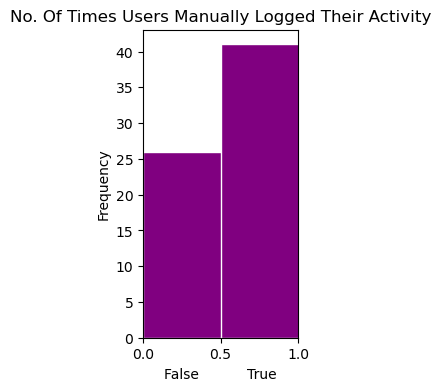

In [166]:
plt.style.use("default")
plt.figure(figsize=(2,4)) # specify size of the chart
plt.hist(weightLog.IsManualReport, bins = 2, 
         width = 0.8, color = "purple", edgecolor = "white")
plt.xlim(0, 1)

# Adding labels
plt.xlabel("False           True")
plt.ylabel("Frequency")
plt.title("No. Of Times Users Manually Logged Their Activity")
plt.show()

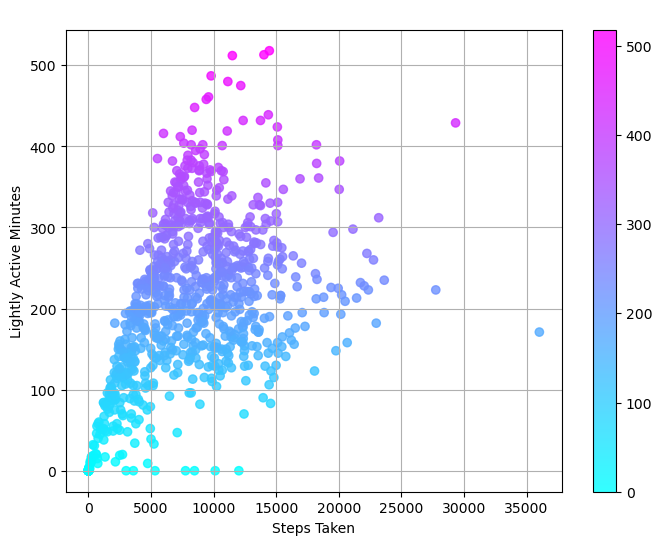

In [33]:
# Plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(dailyActivity.StepTotal, dailyActivity.LightlyActiveMinutes, 
            alpha = 0.8, c = dailyActivity.LightlyActiveMinutes, 
            cmap = "cool")
# Add annotations and visuals
plt.colorbar(orientation = "vertical")
plt.xlabel("Steps Taken")
plt.ylabel("Lightly Active Minutes")
plt.title(" ")

plt.grid(True)
plt.show()

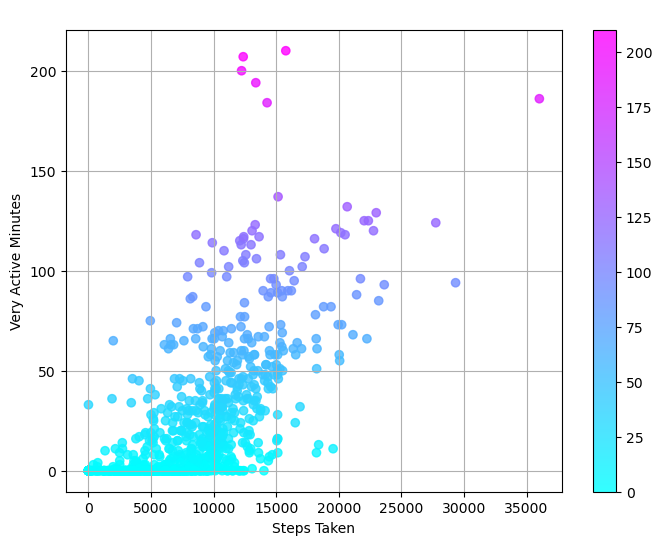

In [129]:
# Plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(dailyActivity.StepTotal, dailyActivity.VeryActiveMinutes, 
            alpha = 0.8, c = dailyActivity.VeryActiveMinutes, 
            cmap = "cool")

# Add annotations and visuals
plt.colorbar(orientation = "vertical")
plt.xlabel("Steps Taken")
plt.ylabel("Very Active Minutes")
plt.title(" ")

plt.grid(True)
plt.show()

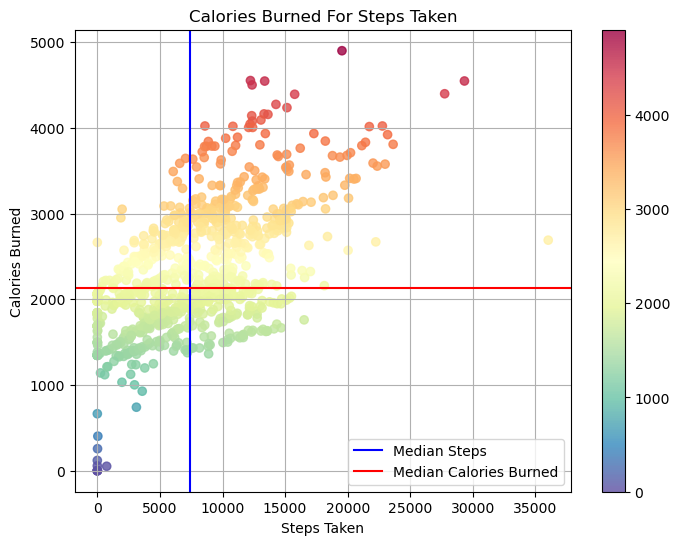

In [34]:
# Plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(dailyActivity.StepTotal, dailyCalories.Calories, 
            alpha = 0.8, c = dailyCalories.Calories, 
            cmap = "Spectral_r")

# Add annotations and visuals
median_calories = 2134
median_steps = 7405

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median Steps")
plt.axhline(median_calories, color = "Red", label = "Median Calories Burned")
plt.xlabel("Steps Taken")
plt.ylabel("Calories Burned")
plt.title("Calories Burned For Steps Taken")
plt.grid(True)
plt.legend()
plt.show()

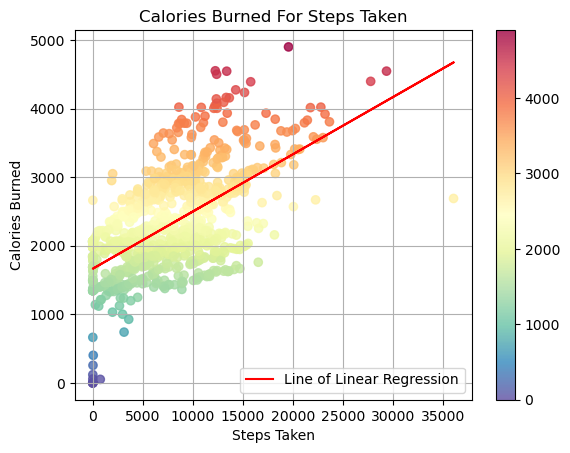

In [49]:
import matplotlib.pyplot as plt
from scipy import stats
x = dailyActivity["StepTotal"]
y = dailyCalories["Calories"]
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y, alpha = 0.8, c = y, 
            cmap = "Spectral_r")
plt.plot(x, mymodel, color ="red", label = "Line of Linear Regression")
plt.colorbar(orientation = "vertical")
plt.xlabel("Steps Taken")
plt.ylabel("Calories Burned")
plt.title("Calories Burned For Steps Taken")
plt.grid(True)
plt.legend()
plt.show()

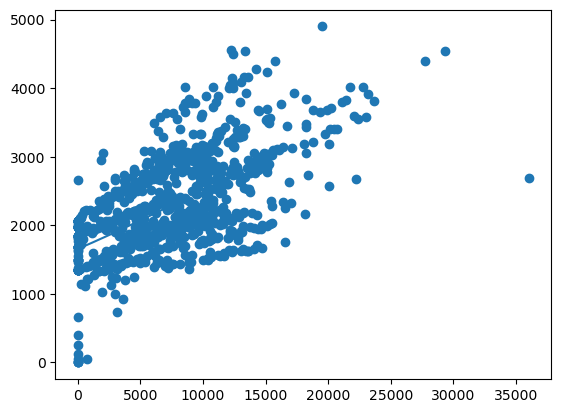

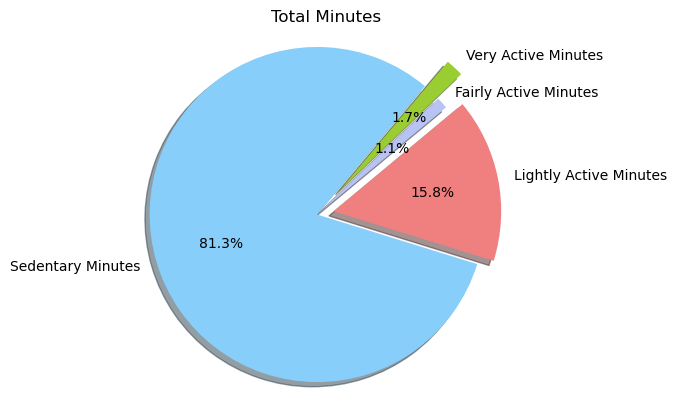

In [35]:

# Add the minutes in each category
sedentary = dailyActivity["SedentaryMinutes"].sum()
lightlyActive = dailyActivity["LightlyActiveMinutes"].sum()
fairlyActive = dailyActivity["FairlyActiveMinutes"].sum()
veryActive = dailyActivity["VeryActiveMinutes"].sum()


my_data = [sedentary, lightlyActive, fairlyActive, veryActive]
my_labels = "Sedentary Minutes", "Lightly Active Minutes", "Fairly Active Minutes", "Very Active Minutes"
my_colors = ["lightskyblue", "lightcoral", "#B7C3F3","yellowgreen"]
my_explode = (0, 0.1, 0,0.2)
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%', startangle=50, shadow=True, colors=my_colors, explode=my_explode)
plt.title('Total Minutes')
plt.axis('equal')
plt.show()